# 2-2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = "SimHei"  # 正常显示中文

# 消除警告的命令
import warnings
warnings.filterwarnings("ignore")

# 读取 LR_new.csv
lr_new_data = pd.read_csv('LR_new.csv')

### 第一的行业大类

In [3]:
# 将 Accper 列转换为日期时间对象
lr_new_data['Accper'] = pd.to_datetime(lr_new_data['Accper'])

# 筛选出2019年9月的数据
september_2019_data = lr_new_data[(lr_new_data['Accper'].dt.year == 2019) & (lr_new_data['Accper'].dt.month == 9)]

# 按行业大类进行分组，并计算利润率的均值
mean_profit_rate_by_industry = september_2019_data.groupby('Indnme')['利润率'].mean()

# 确定营业利润率均值排名第1的行业大类
top_industry = mean_profit_rate_by_industry.idxmax()

# 筛选出营业利润率排名第1的行业大类的数据
top_industry_data = september_2019_data[september_2019_data['Indnme'] == top_industry]

### 图表1 数据

In [4]:
# 统计该行业大类下不同细类的利润率
profit_rate_by_subcategory = top_industry_data.groupby('Nindnme')['利润率'].mean()

# 输出统计结果
print(f"2019年9月营业利润率均值排名第1的行业大类为：{top_industry}")
print("该行业大类不同细类的利润率统计结果：")
print(profit_rate_by_subcategory)

2019年9月营业利润率均值排名第1的行业大类为：金融
该行业大类不同细类的利润率统计结果：
Nindnme
保险业       0.020105
其他金融业     0.162425
证券、期货业    0.370759
银行业       0.152000
Name: 利润率, dtype: float64


### 图表1 绘制

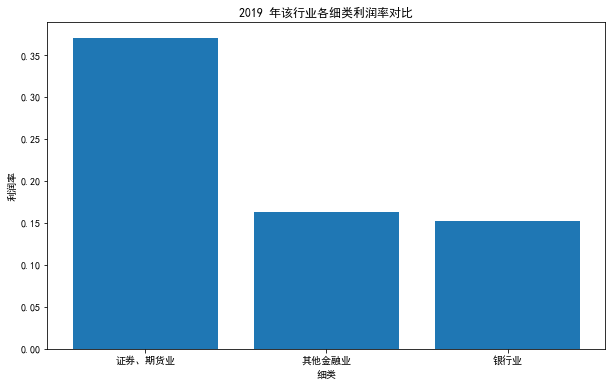

In [8]:
# 排序，获取利润率排名前三的细类
top_3_subcategories = profit_rate_by_subcategory.nlargest(3)

# 提取排名前三细类的利润率和细类名称
profit_rates = top_3_subcategories.values
subcategories = top_3_subcategories.index

# 设置图表尺寸
plt.figure(figsize=(10, 6))

# 绘制柱状图
plt.bar(subcategories, profit_rates)
plt.title('2019 年该行业各细类利润率对比')
plt.xlabel('细类')
plt.ylabel('利润率')
plt.show()

### 图表2 数据

In [9]:
# 将 Accper 列转换为日期时间对象
lr_new_data['Accper'] = pd.to_datetime(lr_new_data['Accper'])

# 筛选出2019年9月的数据
september_2019_data = lr_new_data[(lr_new_data['Accper'].dt.year == 2019) & (lr_new_data['Accper'].dt.month == 9)]

# 按行业大类进行分组，并计算利润率的均值
mean_profit_rate_by_industry = september_2019_data.groupby('Indnme')['利润率'].mean()

# 确定营业利润率均值排名第1的行业大类
top_industry = mean_profit_rate_by_industry.idxmax()

# 筛选出营业利润率排名第1的行业大类的数据
top_industry_data = september_2019_data[september_2019_data['Indnme'] == top_industry]

# 确定利润率排名第1的细类
top_subcategory = top_industry_data.groupby('Nindnme')['利润率'].mean().idxmax()

# 筛选出利润率排名第1的细类的数据
top_subcategory_data = top_industry_data[top_industry_data['Nindnme'] == top_subcategory]

# 按利润率降序排序
sorted_data = top_subcategory_data.sort_values(by='利润率', ascending=False)

# 输出排序结果
print(sorted_data[['Stkcd','Indnme','Nindnme', '利润率']])

        Stkcd Indnme Nindnme       利润率
23392  300059     金融  证券、期货业  0.535592
26290  600783     金融  证券、期货业  0.527919
23773  600864     金融  证券、期货业  0.502979
25896  600155     金融  证券、期货业  0.376119
24588  300309     金融  证券、期货业  0.347491
23768     666     金融  证券、期货业  0.206768
26053  600621     金融  证券、期货业  0.098445


In [10]:
sorted_data.shape

(7, 19)

In [11]:
sorted_data

,Stkcd,Accper,Typrep,B001000000,B001100000,B001101000,B001200000,B001201000,B001207000,B001209000,B001210000,B001211000,B001212000,A002000000,A001000000,Indnme,Nindnme,利润率,资产负债率
23392,300059,2019-09-30,A,1.658602e+09,3.096765e+09,1.059071e+09,1.669572e+09,2.891800e+08,31118310.78,2.459533e+08,1.077037e+09,9.597721e+06,1.668479e+07,3.255539e+10,5.333240e+10,金融,证券、期货业,0.535592,0.610424
26290,600783,2019-09-30,A,8.265894e+07,1.565751e+08,1.565751e+08,2.421734e+08,1.104838e+08,3876480.46,9.689093e+06,6.229195e+07,5.450320e+07,1.328839e+06,2.396555e+09,6.025004e+09,金融,证券、期货业,0.527919,0.397768
23773,600864,2019-09-30,A,7.543090e+08,1.499683e+09,7.957091e+08,1.831163e+09,6.380509e+08,17102010.12,1.431345e+05,9.203788e+08,1.687038e+07,1.217790e+08,2.738869e+10,4.094630e+10,金融,证券、期货业,0.502979,0.668893
25896,600155,2019-09-30,A,4.658303e+08,1.238518e+09,1.654022e+08,1.652482e+09,2.131925e+07,17063827.20,8.261953e+05,1.205688e+09,2.095434e+07,2.037906e+08,2.734862e+10,4.251582e+10,金融,证券、期货业,0.376119,0.643257
24588,300309,2019-09-30,A,2.623341e+08,7.549383e+08,7.549383e+08,4.992759e+08,3.727912e+08,1618598.77,1.226439e+07,5.491526e+07,1.105298e+07,4.663348e+07,5.631812e+09,7.783133e+09,金融,证券、期货业,0.347491,0.723592
23768,666,2019-09-30,A,1.509691e+09,7.301373e+09,3.900351e+09,5.985853e+09,2.800197e+09,55708106.17,1.206240e+08,2.676421e+09,3.132728e+08,1.962973e+07,1.321529e+10,3.484747e+10,金融,证券、期货业,0.206768,0.379232
26053,600621,2019-09-30,A,6.899693e+07,7.008659e+08,1.096942e+08,9.351524e+08,6.115611e+07,6341965.18,4.969891e+06,4.703486e+07,-8.465232e+06,7.053953e+06,1.514986e+10,2.176735e+10,金融,证券、期货业,0.098445,0.695990


### 图表3 绘制

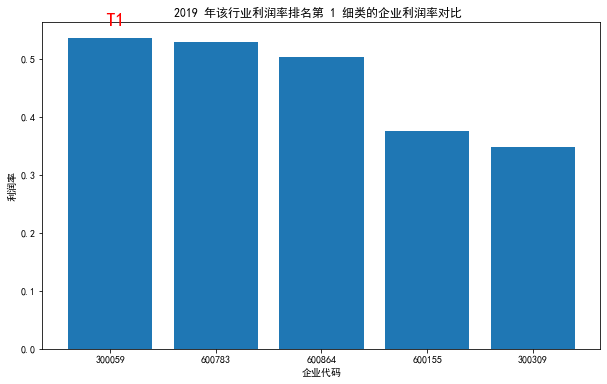

In [41]:
# 获取排名前5的企业数据
top_5_companies = sorted_data.head(5)

# 设置图表尺寸
plt.figure(figsize=(10, 6))
x=[1,2,3,4,5]
x_label = top_5_companies['Stkcd'].to_list()
y = top_5_companies['利润率'].to_list()

# 绘制柱状图
plt.bar(x, y)
plt.title('2019 年该行业利润率排名第 1 细类的企业利润率对比 ')
plt.xlabel('企业代码')
plt.ylabel('利润率')

plt.xticks(x, x_label)  # 绘制x刻度标签

# 将利润率排名第1的企业标记为"T1"
plt.annotate('T1', xy=(1, y[0]), xytext=(5, 10),textcoords='offset points', ha='center', va='bottom', fontsize=20, color='red')

plt.show()

### 图表3 数据

In [33]:
# 将 Accper 列转换为日期时间对象
lr_new_data['Accper'] = pd.to_datetime(lr_new_data['Accper'])

# 确定企业代码和日期
T1 = 300059

# 筛选出指定企业和日期的财务报表数据
financial_data = lr_new_data[(lr_new_data['Stkcd'] == T1) & (lr_new_data['Accper'].dt.year == 2019) & (lr_new_data['Accper'].dt.month == 9)]


financial_data

,Stkcd,Accper,Typrep,B001000000,B001100000,B001101000,B001200000,B001201000,B001207000,B001209000,B001210000,B001211000,B001212000,A002000000,A001000000,Indnme,Nindnme,利润率,资产负债率
23392,300059,2019-09-30,A,1.658602e+09,3.096765e+09,1.059071e+09,1.669572e+09,289180011.2,31118310.78,245953275.2,1.077037e+09,9597721.44,16684787.5,3.255539e+10,5.333240e+10,金融,证券、期货业,0.535592,0.610424


### 图表3 绘制

In [38]:
# 确定财务报表项目和对应的列名
labels = [ '营业成本','营业税金及附加','销售费用','管理费用','财务费用']
values = ['B001201000', 'B001207000', 'B001209000', 'B001210000', 'B001211000']

values_data = []
for i in values:
    values_data.append(financial_data[i].values[0])
print(values_data)

[289180011.2, 31118310.78, 245953275.2, 1077037488.0, 9597721.44]


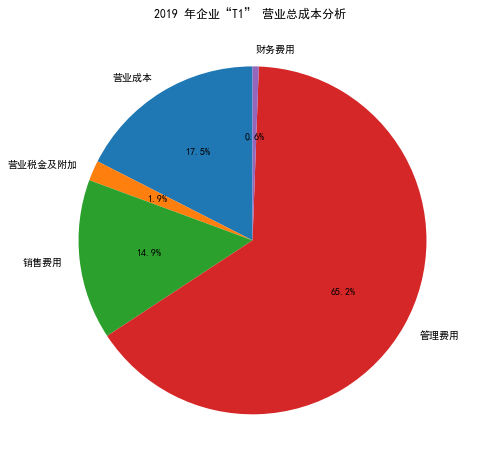

In [40]:
# 设置图表尺寸
plt.figure(figsize=(8, 8))

# 绘制饼图
plt.pie(values_data, labels=labels, autopct='%1.1f%%', startangle=90)

# 添加标题
plt.title('2019 年企业“T1” 营业总成本分析 ')

plt.show()

### 图表4 数据 

In [44]:
# 将 Accper 列转换为日期时间对象
lr_new_data['Accper'] = pd.to_datetime(lr_new_data['Accper'])

# 确定企业代码和季度日期
T1 = 300059
quarters = ['2019-03-31', '2019-06-30', '2019-09-30']

In [45]:
# 筛选出指定企业和季度的财务报表数据
financial_data = lr_new_data[(lr_new_data['Stkcd'] == T1) & (lr_new_data['Accper'].isin(quarters))]
financial_data

,Stkcd,Accper,Typrep,B001000000,B001100000,B001101000,B001200000,B001201000,B001207000,B001209000,B001210000,B001211000,B001212000,A002000000,A001000000,Indnme,Nindnme,利润率,资产负债率
18559,300059,2019-03-31,A,4.590224e+08,9.267591e+08,3.210003e+08,5.620134e+08,9.564718e+07,9126762.03,8.147275e+07,3.342576e+08,32763933.62,8745140.51,4.551168e+10,6.380477e+10,金融,证券、期货业,0.495299,0.713296
19804,300059,2019-06-30,A,1.043203e+09,1.997742e+09,6.769593e+08,1.130847e+09,1.859926e+08,21624423.91,1.641269e+08,7.178001e+08,30216914.19,11086031.84,3.420219e+10,5.444673e+10,金融,证券、期货业,0.522191,0.628177
23392,300059,2019-09-30,A,1.658602e+09,3.096765e+09,1.059071e+09,1.669572e+09,2.891800e+08,31118310.78,2.459533e+08,1.077037e+09,9597721.44,16684787.50,3.255539e+10,5.333240e+10,金融,证券、期货业,0.535592,0.610424


In [62]:
a = ['营业总收入','营业总成本']
a_v = ['B001100000','B001200000']

zsr_data = []
zcb_data = []
v = []
for i in a_v:
    for n in financial_data[i]:
        v.append(n)
zsr_data, zcb_data = v[:3],v[3:]
print(zsr_data, zcb_data)

[926759053.3, 1997742040.0, 3096764842.0] [562013399.1, 1130847075.0, 1669571594.0]


In [71]:
b = ['利润率','资产负债率']

lrl_data = []
zcfzl_data = []
v = []
for i in b:
    for n in financial_data[i]:
        v.append(n)
lrl_data, zcfzl_data = v[:3],v[3:]
print(lrl_data, zcfzl_data)

[0.4952985752505084, 0.522190817989694, 0.5355918429792094] [0.7132959638678065, 0.6281771278152665, 0.6104242502996307]


### 图表4 绘制

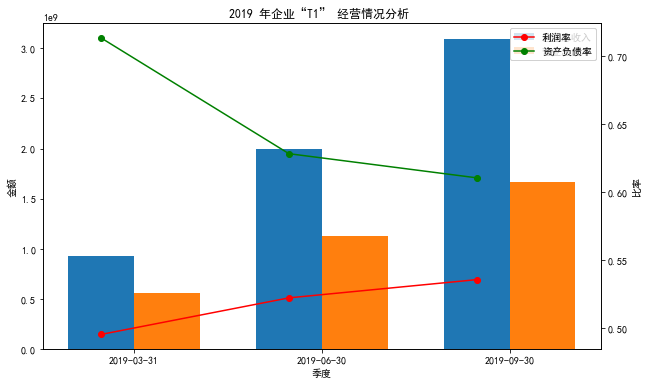

In [73]:
# 三个季度
quarters = ['2019-03-31', '2019-06-30', '2019-09-30']
# 总收入
zsr_data = [926759053.3, 1997742040.0, 3096764842.0]
# 总成本
zcb_data = [562013399.1, 1130847075.0, 1669571594.0]
# 利润率
lrl_data = [0.4952985752505084, 0.522190817989694, 0.5355918429792094]
# 资产负债率
zcfzl = [0.7132959638678065, 0.6281771278152665, 0.6104242502996307]

# 绘制柱状图
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(quarters))

plt.bar(index, zsr_data, width=bar_width, label='营业总收入')
plt.bar([i + bar_width for i in index], zcb_data, width=bar_width, label='营业总成本')

plt.xlabel('季度')
plt.ylabel('金额')
plt.xticks([i + bar_width/2 for i in index], quarters)
plt.legend()

# 创建副坐标轴
ax2 = plt.twinx()

# 绘制折线图
ax2.plot(quarters, lrl_data, marker='o', linestyle='-', color='r', label='利润率')
ax2.plot(quarters, zcfzl, marker='o', linestyle='-', color='g', label='资产负债率')

ax2.set_ylabel('比率')

# 设置副坐标轴标签
ax2.set_xlabel('季度')

# 添加标题和图例
plt.title('2019 年企业“T1” 经营情况分析 ')
ax2.legend(loc='upper right')

plt.show()